This Jupyter notebook was created by Kaisa Taipale for run:\the\world Girls' Machine Learning Day Camp 2018. Copyright permissions at the end of the file.

## Decision Trees

First we import numpy for functions to do with numbers, then tree from sklearn (scikit-learn) to do decision trees, and then pyplot, a way of plotting that comes in the matplotlib package. 


In [17]:
import numpy as np
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt
# this line makes all the plots a bit bigger -- play with it if you find the images too small
plt.rcParams['figure.figsize'] = [10, 6]

Then I make a lot of fake data, just for examples. I have to make the features (the points) and then the labels (which class the points are in) since decision trees are for classification.

In [18]:
features_train = np.array([[-7,1],[-8,-1,],[-3,-2],[1,1],[2,1],[3,2],[3,1],[3,0]]) #features
labels_train = np.array([1,1,1,2,2,2,2,2]) #labels

In [19]:
features_3_train = np.array([[-7,1],[-8,-1,],[-3,-2],[1,1],[2,1],[3,2],[4,1],[3,0],[3,-2],[3.2,-3.2,],[3.8,-3.3],[3.9,-4.1],[4.3,-3]]) #features
labels_3_train = np.array([1,1,1,2,2,2,2,2,3,3,3,3,3])

In [20]:
features_3_train_sp = np.array([[-13,-8],[-7,1],[-8,-1,],[-3,-2],[1,2],[2,1],[3,2],[4,1],[3,0],[3,-2],[3.2,-3.2,],[3.8,-3.3],[3.9,-4.1],[4.3,-3]]) #features
labels_3_train_sp = np.array([1,1,1,1,2,2,2,2,2,3,3,3,3,3])

(-9, 3)

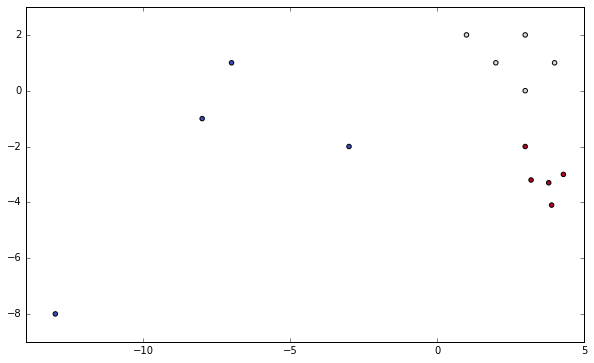

In [21]:
# Here c says to plt.scatter, "Please color in points according to their labels!"
# The parameter cmap is for "colormap", and it tells what colors to use. Right now I have cool to warm.
# you could look at https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/ 
# for more color palettes!
plt.scatter(features_3_train_sp[:,0],features_3_train_sp[:,1],c=labels_3_train_sp,cmap=plt.cm.coolwarm)
plt.xlim(-14,5)
plt.ylim(-9,3)

(-4, 3)

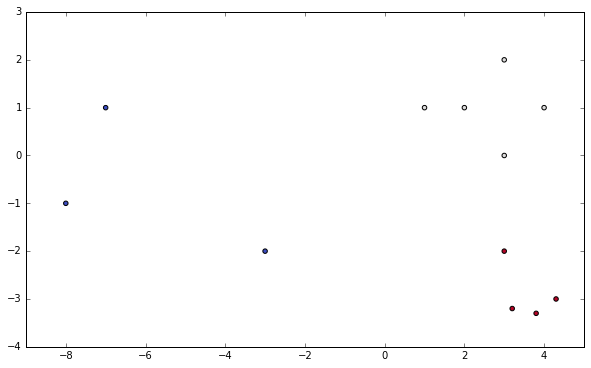

In [22]:
plt.scatter(features_3_train[:,0],features_3_train[:,1],c=labels_3_train,cmap=plt.cm.coolwarm)
plt.xlim(-9,5)
plt.ylim(-4,3)

Using code from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html, here's a way to plot the decision boundary. The function make_meshgrid makes a grid of points $(x,y)$ each h units apart -- the idea is to cover the whole area. Then plot_contour makes a classification for every point in the meshgrid and colors it in, also filling in the gaps. That gives you the colored areas in the graph below.

If you want to play with these functions, consider making a copy of the code and giving it a name like make_meshgrid_2. It's nice to have the original version!

In [23]:
# the computer needs a grid of points to calculate the colors at:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


In [24]:
# This takes in the graph axes, the model, the grid above, and plots the colors

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [25]:
# this splits the data we input into the x-components and the y-components,
# and makes the grid based on the data
X=features_3_train
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

In [26]:
# Now we fit the tree.
# First you specify that you're using the DecisionTreeClassifier model from the tree package:
clf = tree.DecisionTreeClassifier(min_samples_split=2)
# Then, once you've said "Computer, I'm using DecisionTreeClassifier!" you actually fit the model.
clf = clf.fit(features_3_train, labels_3_train)


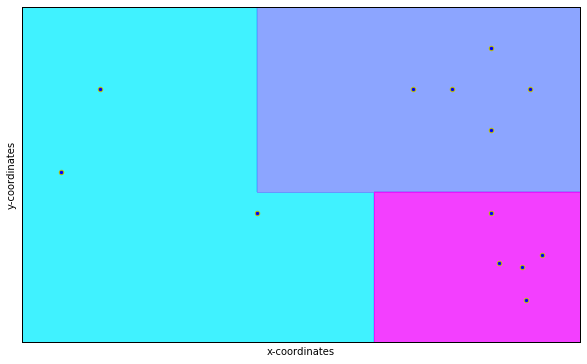

In [27]:
# Let's plot this:
fig, ax = plt.subplots()
# play with the colors here: plt.cm. winter, viridis, inferno, magma, seismic, wistia
# https://matplotlib.org/examples/color/colormaps_reference.html
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1,  cmap=plt.cm.binary, s=20, edgecolors='y')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x-coordinates')
ax.set_ylabel('y-coordinates')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [28]:
# With three groups spread out:
clf3 = clf.fit(features_3_train_sp, labels_3_train_sp)

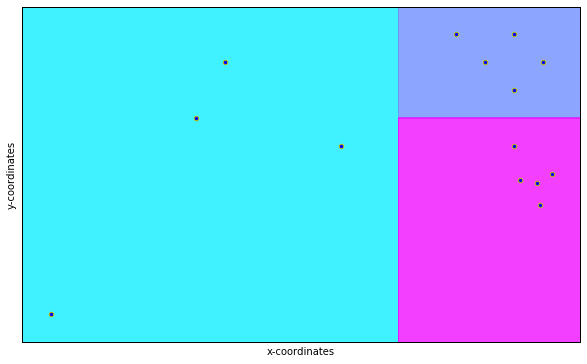

In [29]:
X=features_3_train_sp
# this splits the data into x and y components, and makes the grid based on the data
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
# Let's plot this:
fig, ax = plt.subplots()
# play with the colors here: plt.cm. winter, viridis, inferno, magma, seismic, wistia
# https://matplotlib.org/examples/color/colormaps_reference.html
plot_contours(ax, clf3, xx, yy,
                  cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1,  cmap=plt.cm.binary, s=20, edgecolors='y')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x-coordinates')
ax.set_ylabel('y-coordinates')
ax.set_xticks(())
ax.set_yticks(())
#ax.set_title(title) # I didn't give a title yet
plt.show()
# yep, that's a line. 

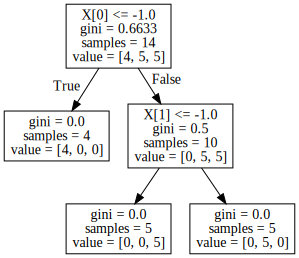

In [30]:
# Installing graphviz was a pain
# from the terminal, I ran "conda install graphviz"
# and then I ran "pip install graphviz"
# and then this worked!
# This probably WILL NOT work on the Windows computers...
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph
# to read this, note that X[0] is the x-coordinate
# and X[1] is the y-coordinate

We should work with some data split into training and testing sets. Check out the iris data for instance :)


## Iris data

Visualization is harder with a four-dimensional dataset, but let's see what we can do. Here we also introduce some VERY IMPORTANT VERY IMPORTANT concepts -- splitting the data into randomly selected training data and testing data, and then checking the accuracy of our model using that testing data.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [32]:
iris = datasets.load_iris()
# We'll use the same names as the scikit-learn tutorial so that you can use that code if you like
iris_X = iris.data # this is our data
iris_y = iris.target # these are the labels

In [33]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

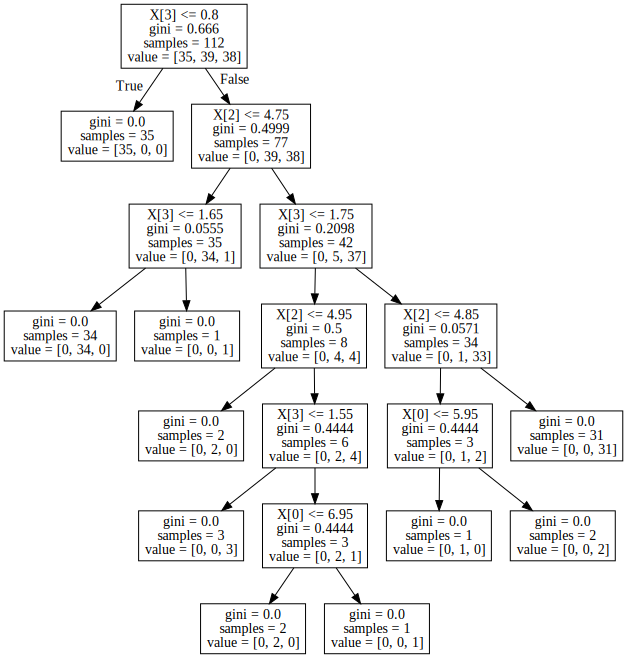

In [34]:
# Now we fit the tree
clf = tree.DecisionTreeClassifier(min_samples_split=2)
clf = clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

How do we visualize what's happening here? That's a hard question. Let's get an approximation, at least, by visualizing [pairwise decision boundaries](http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html). So we'll look at every single pair of variables (every pair from sepal length, sepal width, petal length, petal width) and plot those. Note that I COPIED THIS CODE from scikit-learn and changed the colors. Copying and modifying code is a great way to learn -- we want you to use this technique where copyright law allows and give credit to the original authors!

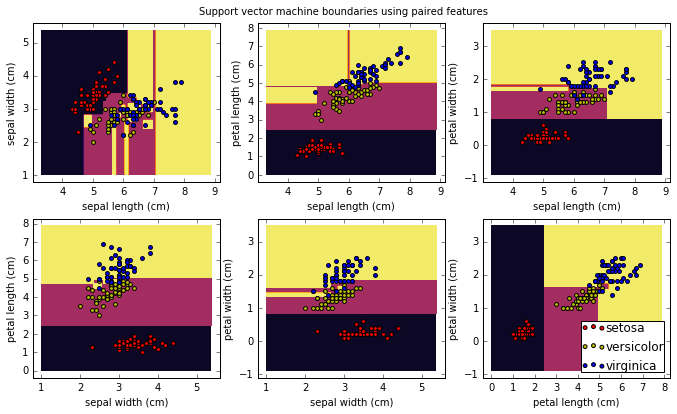

In [35]:
# From scikit learn tutorial at http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)
    #fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.inferno)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.inferno, edgecolor='black', s=15)
               
plt.suptitle("Support vector machine boundaries using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

Changing the minimum number of classes in the final branches of the decision tree makes a big difference in the model. Below, I'll change the min_samples_split parameter in DecisionTreeClassifier to 6, so the decision tree always has to have at least 6 points in each branch. Can you see how the decision boundaries in the plots change?

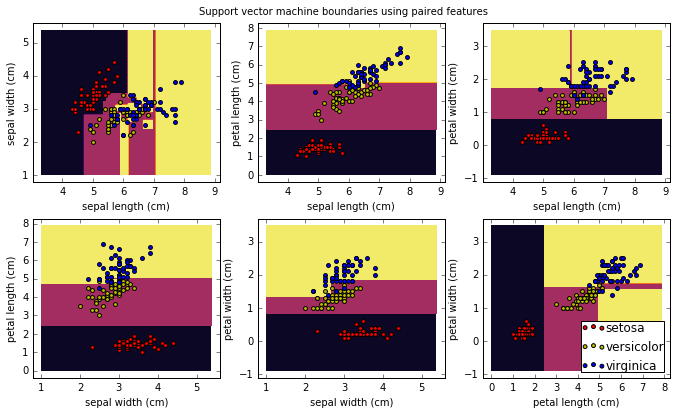

In [36]:
# From scikit learn tutorial at http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
# but with change of min_samples_split parameter in DecisionTreeClassifier
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier(min_samples_split=6).fit(X, y)
    #fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.inferno)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.inferno, edgecolor='black', s=15)
               
plt.suptitle("Support vector machine boundaries using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

Which model do you think is better, the one with 6 outcomes minimum for each branch, or the one where you can have just 1 or 2 outcomes in a branch? Let's test something like this, although fitting the model on all four variables instead of just two at a time:

In [37]:
X = iris.data
y = iris.target
# initial random state is 23

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

clf2 = tree.DecisionTreeClassifier(min_samples_split=2)
clf2 = clf2.fit(X_train, y_train)
pred2 = clf2.predict(X_test)

clf6 = tree.DecisionTreeClassifier(min_samples_split=6)
clf6 = clf6.fit(X_train, y_train)
pred6 = clf6.predict(X_test)

print("The accuracy with min_samples_split=2 is",accuracy_score(pred2,y_test))

print("The accuracy with min_samples_split=6 is",accuracy_score(pred6,y_test))


The accuracy with min_samples_split=2 is 1.0
The accuracy with min_samples_split=6 is 0.947368421053


Does this surprise you or not? What if min_samples_split=3? What if you change the random_state? Use random_state=32 and then random_state=25 and then random_state = 45 and then random_state=39. Any differences?

I want you to really pay attention to the fact that 

## Breast cancer data set

Let's play with the breast cancer data set, too.

In [38]:
from sklearn.datasets import load_breast_cancer
bcdata = load_breast_cancer()
# What does the data look like? I'm just going to take a look...
bcdata

{'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 i

In [39]:
# Ok -- looks like there is the observation data, then the target (the classification of the tumors 
# as malignant or benign by human doctors). Let's look at the target.
bcdata['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [40]:
bcdata.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

I want to separate training and testing data, again, so let's pick a random training set (75% of the data).


In [41]:
X = bcdata.data
y = bcdata.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Let's fit the decision tree:

In [42]:
clf = tree.DecisionTreeClassifier(min_samples_split=2)
clf = clf.fit(X_train, y_train)

Now let's use X_test (the observations about the tumors that we saved for the testing set) as an input to our model. That means we make a prediction using clf, with X_test as the input.

In [43]:
pred = clf.predict(X_test)

What's the accuracy of our prediction? 

In [44]:
accuracy_score(pred, y_test)

0.94405594405594406

I got around 94%! Not bad! Is this good enough, in your opinion?

## Random forests

If you put a lot of trees together.... you get a forest!

So far, we have:
* made a single decision tree by hand from all the data we had
* split our data into training and testing sets, so that we could make a decision tree on the training data and test the accuracy of the model on our testing data, 
* and looked over our shoulders at our neighbors' decision trees and noticed that sometimes they're different, even though we started with the same data.

Now, let's do some _ensemble_ learning. Ensemble means "together" in French, and ensemble learning involves putting together lots of models and looking at their average predictions, or the most popular prediction, depending on what you want to do. Random forests involve picking a random subset of the data and fitting a tree, then picking another random subset of the data and making a tree, and making tree after tree until you have a forest.

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [46]:
rfpred = rf.predict(X_test)

In [47]:
accuracy_score(rfpred, y_test)

0.93706293706293708

Python does the random forest part automatically, and our accuracy went up to around 97%. When it comes to cancer, how important do you think that 3% is?

## Now you try:

There are a few more datasets automatically included in our distribution of scikit-learn. Load the wine dataset using datasets.load_wine(). Remember to give it a name when you load it! The wine dataset has more information here: https://archive.ics.uci.edu/ml/datasets/wine

Can you classify the three different types of grapes?


In [48]:
#load the wine dataset


In [49]:
# make sure you have data and labels


In [50]:
# divide your data into training and testing data


In [51]:
# select the DecisionTreeClassifier 
# and then fit the model to the training data


In [52]:
# Can you plot some visualizations? This requires understanding the data better!

In [53]:
# Check the accuracy of your decision tree model on the testing set


In [54]:
# Do you get better or worse accuracy if you change the minimum number of samples in each split?
# What value gives the best accuracy?